# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/chlin41/Downloads/Day004Data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train1=app_train.groupby(['DAYS_EMPLOYED']).size()
print(app_train1.head())
print(app_train1.sort_index(ascending=False))

DAYS_EMPLOYED
-17912    1
-17583    1
-17546    1
-17531    1
-17522    1
dtype: int64
DAYS_EMPLOYED
 365243    55374
 0             2
-1             1
-2             2
-3             3
           ...  
-17522         1
-17531         1
-17546         1
-17583         1
-17912         1
Length: 12574, dtype: int64


In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [8]:
app_train2=app_train.groupby(['DAYS_EMPLOYED']).size()
print(app_train2.head())
print(app_train2.sort_index(ascending=False))

DAYS_EMPLOYED
-17912.0    1
-17583.0    1
-17546.0    1
-17531.0    1
-17522.0    1
dtype: int64
DAYS_EMPLOYED
 0.0        2
-1.0        1
-2.0        2
-3.0        3
-4.0        4
           ..
-17522.0    1
-17531.0    1
-17546.0    1
-17583.0    1
-17912.0    1
Length: 12573, dtype: int64


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [40]:
# 觀察相關係數

app_train.corr()['TARGET']


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [42]:
corr_max = app_train.corr()['TARGET'].sort_values(ascending = False)
corr_min = corr_max.sort_values(ascending = True)
print(corr_max)
print(corr_min)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
DAYS_BIRTH                    -0.078239
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
DAYS_EMPLOYED_ANOM                  NaN
Name: TARGET, Length: 110, dtype: float64
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                    -0.078239
FLOORSMAX_AVG                 -0.044003
                                 ...   
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
DAYS_EMPLOYED_ANOM                  NaN
Name: TARGET, Length: 110, dtype: float64


In [45]:
print(corr_max[1:16])
print(corr_min[:15])

DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG       

In [46]:
#  EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來
sub_df = app_train[~app_train["EXT_SOURCE_3"].isnull()]

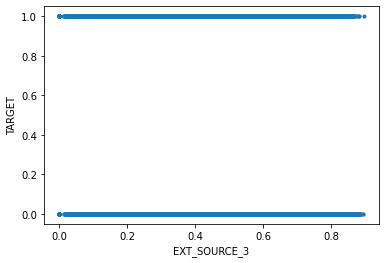

In [47]:
plt.plot(sub_df["EXT_SOURCE_3"], sub_df["TARGET"], ".")
plt.xlabel("EXT_SOURCE_3")
plt.ylabel("TARGET")
plt.show()

In [48]:
sub_df1 = app_train[~app_train["DAYS_EMPLOYED"].isnull()]

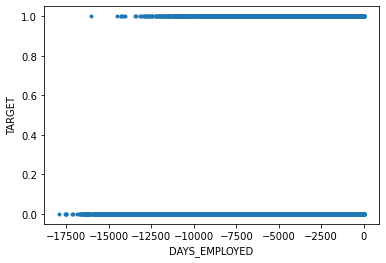

In [49]:
plt.plot(sub_df["DAYS_EMPLOYED"], sub_df["TARGET"], ".")
plt.xlabel("DAYS_EMPLOYED")
plt.ylabel("TARGET")
plt.show()

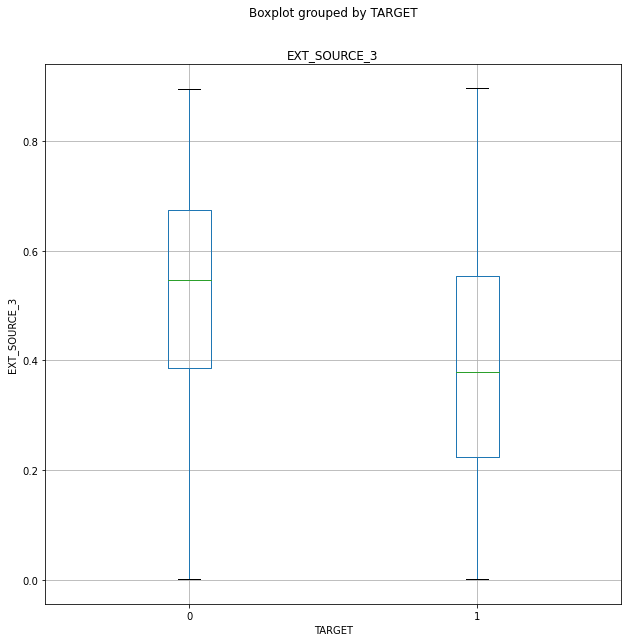

In [50]:
sub_df.boxplot(column=["EXT_SOURCE_3"], by=["TARGET"], figsize = (10, 10))
plt.ylabel("EXT_SOURCE_3")
plt.xlabel("TARGET")
plt.show()

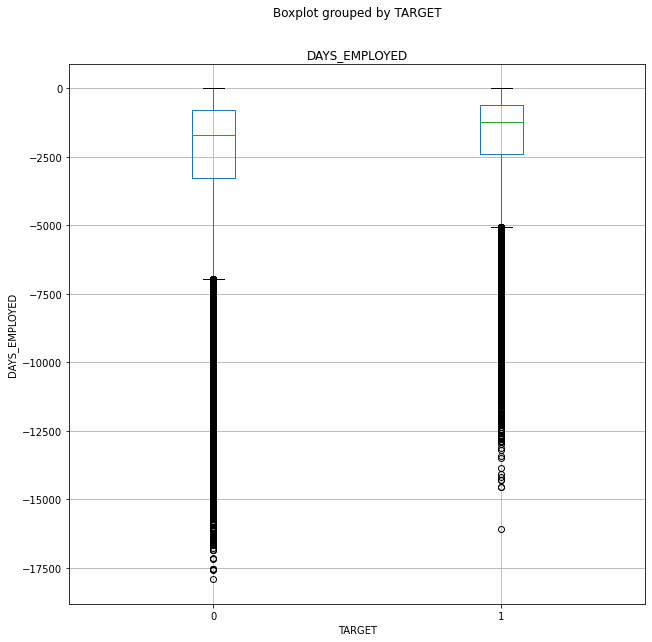

In [51]:
sub_df1.boxplot(column=["DAYS_EMPLOYED"], by=["TARGET"], figsize = (10, 10))
plt.ylabel("DAYS_EMPLOYED")
plt.xlabel("TARGET")
plt.show()